# Explore here

In [354]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *

url = "/workspaces/regularized-linear-regression-PereHDZ/sociodemographic_and_health_data.csv"

df = pd.read_csv(url, sep=',')

df.to_csv('insurance_data.csv', index=False)

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [355]:
#Check the number of rows and columns
df.shape

(3140, 108)

In [356]:
#Check the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [357]:
#Check for constant values
constant_cols = df.nunique() == 1
constant_columns = df.columns[constant_cols].tolist()

constant_columns
#There are no constant columns

[]

In [358]:
#check for duplicates
df.duplicated().sum()

#There are no duplicates

np.int64(0)

In [359]:
#Basic column description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [360]:
#Check for empty elements in the dataset
empty_elements = df.isna() | (df == '')
empty_counts = empty_elements.sum()
rows_with_missing = df[empty_elements.any(axis=1)]
rows_with_missing

#There are no missing elements

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code


In [361]:
#Scale categorical variables
data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[numeric_columns])

df_scal = pd.DataFrame(norm_features, index = df.index, columns = numeric_columns)
df_scal["Heart disease_number"] = df["Heart disease_number"]
df_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


In [362]:
#Check the type of variables
df_scal.info()

#All or our variables are numerical now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 106 entries, fips to Heart disease_number
dtypes: float64(105), int64(1)
memory usage: 2.5 MB


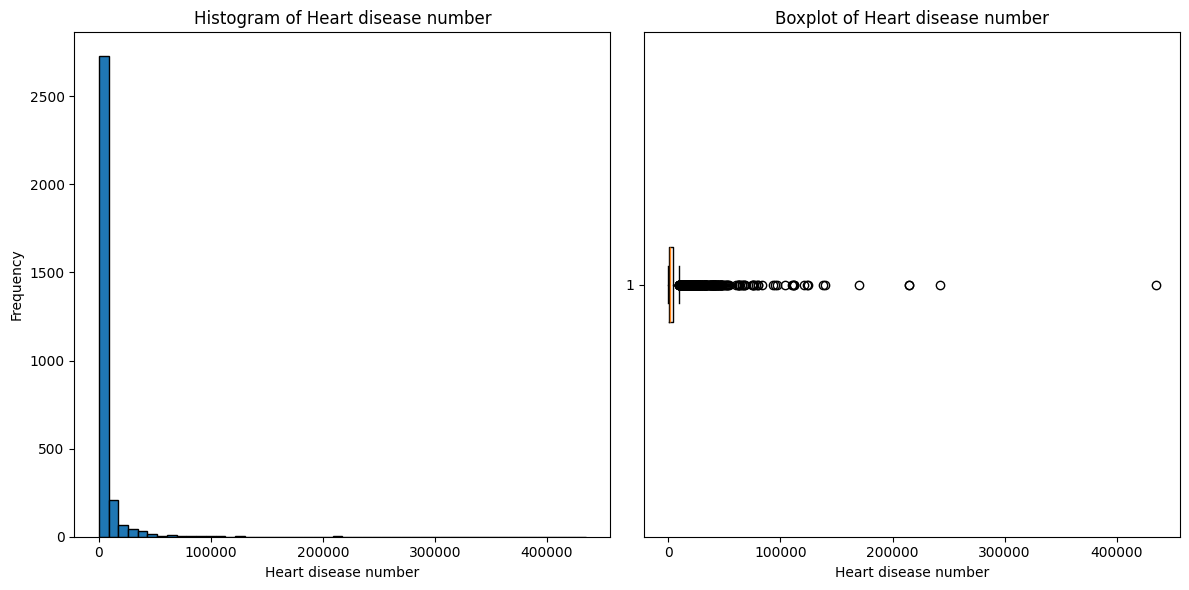

In [363]:
#We have decided to study the variable 'Heart disease_number'. We will plot it to see its distribution

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_scal['Heart disease_number'], bins=50, edgecolor='black')
plt.xlabel('Heart disease number')
plt.ylabel('Frequency')
plt.title('Histogram of Heart disease number')

# Boxplot
plt.subplot(1, 2, 2) 
plt.boxplot(df_scal['Heart disease_number'], vert=False)
plt.xlabel('Heart disease number')
plt.title('Boxplot of Heart disease number')

plt.tight_layout()
plt.show()

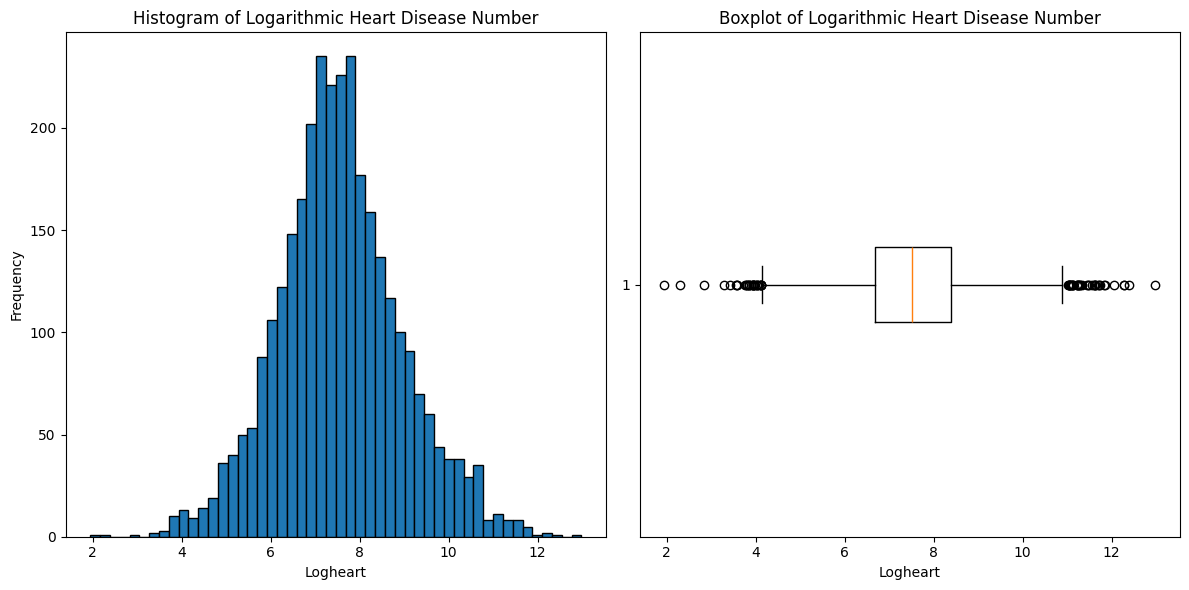

In [364]:
'''Since the majority of observations in price are very concentrated in the same range, it would provide us with more information to turn 
the variable into its logarithmic scale'''
df_scal = df_scal[df_scal['Heart disease_number'] > 0] #We first eliminate any number lower or equal to 0, since they cannot be converted into a logarithmic scale
df_scal['logheart'] = np.log(df_scal['Heart disease_number'])

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_scal['logheart'], bins=50, edgecolor='black')
plt.xlabel('Logheart')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithmic Heart Disease Number')

# Boxplot
plt.subplot(1, 2, 2) 
plt.boxplot(df_scal['logheart'], vert=False)
plt.xlabel('Logheart')
plt.title('Boxplot of Logarithmic Heart Disease Number')

plt.tight_layout()
plt.show()

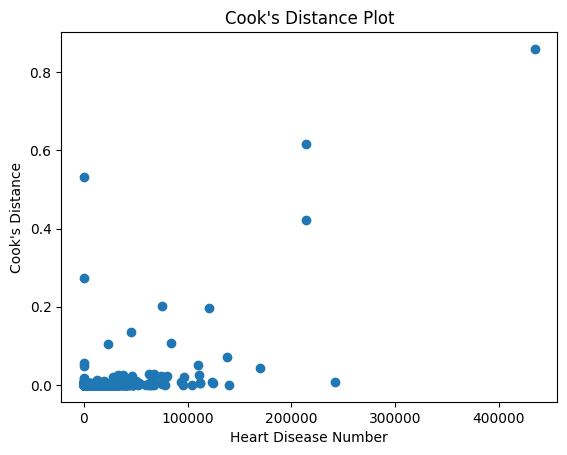

In [365]:
#Cook's Distance
X = df_scal.drop(['Heart disease_number', 'logheart'], axis=1)
y = df_scal['logheart']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

cooks_distance, _ = model.get_influence().cooks_distance

plt.scatter(df_scal['Heart disease_number'], cooks_distance)
plt.xlabel('Heart Disease Number')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [366]:
#Detect the influential observations
threshold = 4 / len(df_scal)
to_delete = np.where(cooks_distance > threshold)[0]
to_delete

array([  67,   69,   70,   71,   75,   81,   86,   89,   91,   94,   96,
        100,  101,  104,  105,  108,  184,  188,  196,  202,  213,  216,
        219,  226,  232,  237,  239,  251,  255,  258,  268,  269,  271,
        273,  282,  298,  306,  315,  317,  323,  328,  332,  344,  345,
        352,  360,  365,  366,  369,  370,  381,  410,  415,  428,  442,
        446,  451,  544,  545,  546,  560,  561,  608,  622,  627,  641,
        669,  738,  934, 1002, 1046, 1055, 1085, 1091, 1205, 1206, 1207,
       1222, 1224, 1227, 1270, 1310, 1338, 1426, 1430, 1443, 1511, 1576,
       1630, 1649, 1654, 1655, 1656, 1679, 1680, 1689, 1697, 1708, 1709,
       1710, 1746, 1755, 1757, 1773, 1778, 1791, 1793, 1799, 1805, 1808,
       1810, 1840, 1846, 1849, 1856, 1866, 1877, 1947, 1979, 1996, 1999,
       2058, 2071, 2101, 2129, 2183, 2200, 2231, 2243, 2250, 2256, 2264,
       2268, 2292, 2367, 2374, 2379, 2387, 2406, 2410, 2419, 2444, 2504,
       2522, 2526, 2534, 2535, 2537, 2543, 2551, 25

In [367]:
#Delete influential observations
df1 = df_scal.drop(index=to_delete)

#Data split
X = df1.drop(['Heart disease_number', 'logheart'], axis=1)
y = df1['logheart']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Non-regularized linear regression
lineal_model = LinearRegression().fit(X_train, y_train)
yhat_test = lineal_model.predict(X_test)
yhat_train = lineal_model.predict(X_train)

def get_metrics(yhat, y_test, yhat_train, y_train):
    metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
    metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
    metrics_dif = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
    return pd.DataFrame(data=[metrics_train, metrics_test, metrics_dif], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Difference'])

get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.903082,0.251720,4.247643
Test set,0.883839,0.285270,4.617792
Difference,-0.019244,0.033551,0.370149


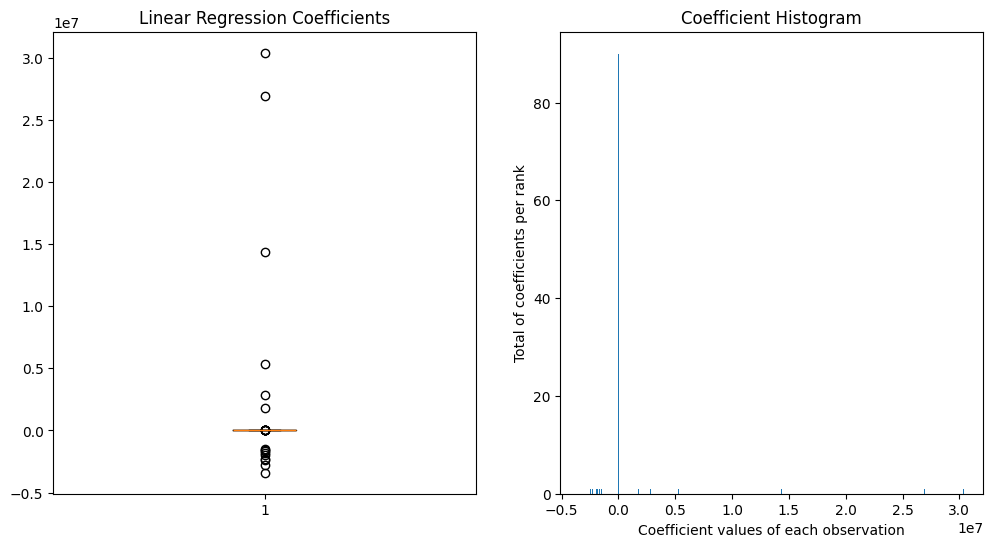

In [368]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(lineal_model.coef_)
plt.title('Linear Regression Coefficients')

# Histogram
plt.subplot(1, 2, 2) 
plt.hist(lineal_model.coef_, 500)
plt.xlabel('Coefficient values of each observation')
plt.ylabel('Total of coefficients per rank')
plt.title('Coefficient Histogram')

plt.show()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.916184567422732, tolerance: 0.28796290063255886
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.33683023755918, tolerance: 0.28796290063255886
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.13551338282457, tolerance: 0.28439389294750567
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_mode

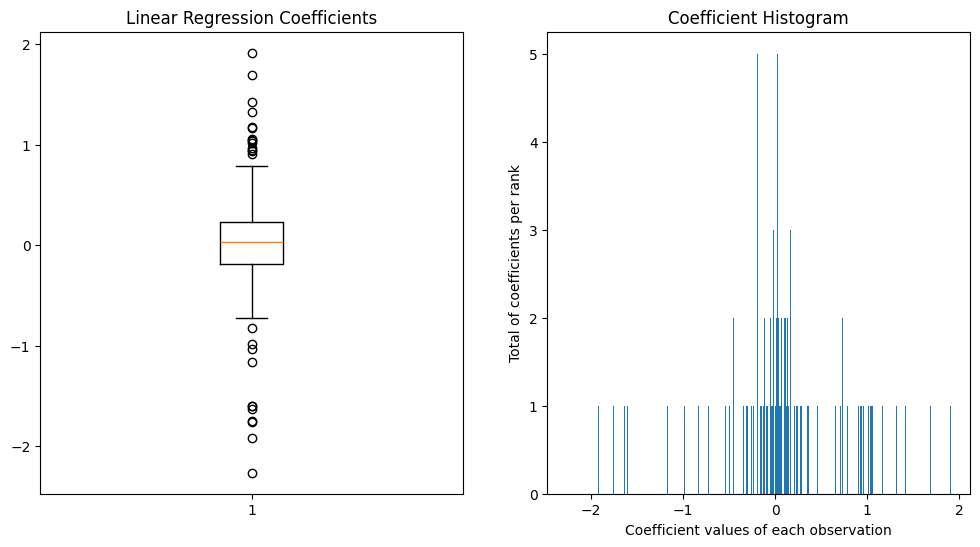

In [369]:
 #Lasso
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 10), cv= 5, random_state=42, n_jobs=-1).fit(X_train, y_train)
yhat_train_lasso = lasso_model.predict(X_train)
yhat_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(lasso_model.coef_)
plt.title('Linear Regression Coefficients')

# Histogram
plt.subplot(1, 2, 2) 
plt.hist(lasso_model.coef_, 500)
plt.xlabel('Coefficient values of each observation')
plt.ylabel('Total of coefficients per rank')
plt.title('Coefficient Histogram')

plt.show()

In [370]:
lasso_model.coef_

array([ 0.        ,  0.96550849, -0.18556649,  0.02921792,  0.71495374,
        0.03220672, -1.75951718,  0.34860376,  0.94252564,  0.02775429,
        0.46384623,  0.14363254, -1.03702083,  0.10202365,  1.91408459,
        0.02714054,  0.24593108,  0.23089282, -1.16774868, -0.15962791,
       -0.04590172,  0.10062469, -0.29961715,  0.05061616,  0.16997245,
       -0.14282595, -0.01600598,  0.13549569, -0.04581897,  0.02119803,
       -0.25279567, -0.03424475,  0.02839769, -0.2732108 ,  0.35432606,
        0.06516903,  0.3606859 ,  0.16938352, -0.02812865,  0.13634948,
        0.01462985, -0.11189401,  1.05768481, -0.8305463 , -0.538775  ,
       -0.18574551, -0.15677298, -0.05183485,  0.05129537,  1.01891225,
       -0.11549211,  0.28229503, -0.31098739,  0.07134908,  1.17617246,
       -2.26615582,  1.04886775,  0.04038738, -0.98114755,  0.11604242,
        1.04037036,  0.1610181 ,  0.65511329, -0.49651815, -0.19038499,
        0.21341794, -0.19815025,  0.12852542, -0.02495349,  0.17

In [371]:
print(f'The percentage of cancelled variables is: {round(len(lasso_model.coef_[np.abs(lasso_model.coef_)==0])/len(lasso_model.coef_)*100,2)}%')
print(f'This method uses {len(lasso_model.coef_[np.abs(lasso_model.coef_)>0])} variables.')

The percentage of cancelled variables is: 0.95%
This method uses 104 variables.


In [372]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

#Using Lasso, we have reduced overfitting by approximatelty 0'05%, which is not very high

,R2,Median AE,MAPE
Train set,0.901111,0.255106,4.306342
Test set,0.886672,0.283549,4.630012
Difference,-0.014439,0.028443,0.323670


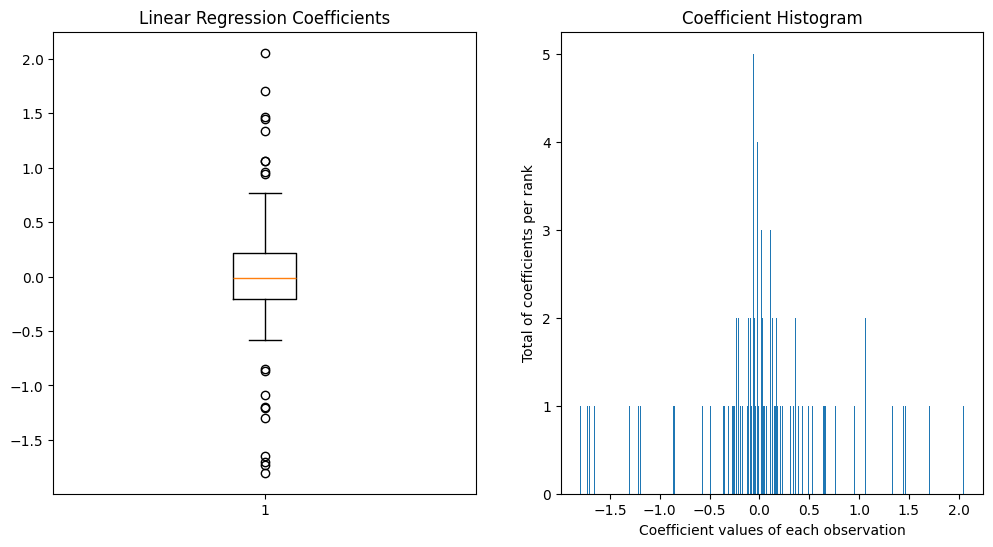

In [373]:
#Ridge
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 10), cv= 5).fit(X_train, y_train)
yhat_train_ridge = ridge_model.predict(X_train)
yhat_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(ridge_model.coef_)
plt.title('Linear Regression Coefficients')

# Histogram
plt.subplot(1, 2, 2) 
plt.hist(ridge_model.coef_, 500)
plt.xlabel('Coefficient values of each observation')
plt.ylabel('Total of coefficients per rank')
plt.title('Coefficient Histogram')

plt.show()

In [374]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

'''Using Ridge, we have reduced overfitting by approximatelty 0'01%, which is not very high. However, we have increased our number of median 
AE by 0'01% as well. Taking this into account, I would argue that the better model in this instance is Lasso'''

,R2,Median AE,MAPE
Train set,0.901683,0.260846,4.302009
Test set,0.887171,0.284547,4.614186
Difference,-0.014512,0.023701,0.312178
